In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
sigA = pd.read_csv("sigA.csv", header=None, names=["Time", "Signal"])
sigB = pd.read_csv("sigB.csv", header=None, names= ["Time", "Signal"])
sigC = pd.read_csv("sigC.csv", header=None, names= ["Time", "Signal"])
sigD = pd.read_csv("sigD.csv", header=None, names= ["Time", "Signal"])
sigA.head()

,Time,Signal
0,0.0000,2.358083
1,0.0001,2.615750
2,0.0002,2.855712
3,0.0003,2.873526
4,0.0004,2.119535


##PROBLEM 2

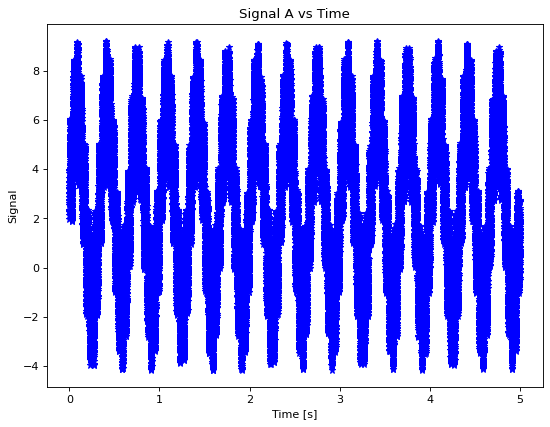

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
timeA = sigA["Time"].to_numpy()
signalA = sigA["Signal"].to_numpy()
plt.plot(timeA,signalA,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal A vs Time')
plt.show()

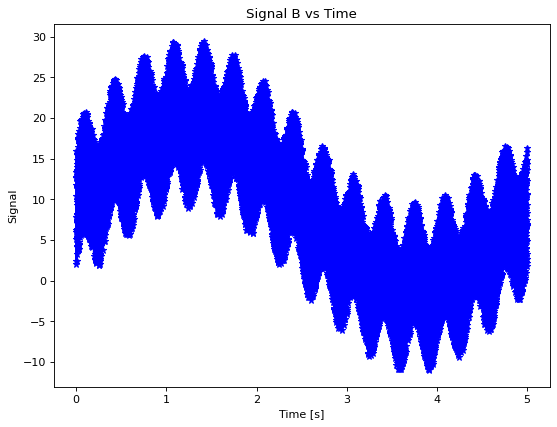

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
timeB = sigB["Time"].to_numpy()
signalB = sigB["Signal"].to_numpy()
plt.plot(timeB,signalB,'b-*')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal B vs Time')
plt.show()

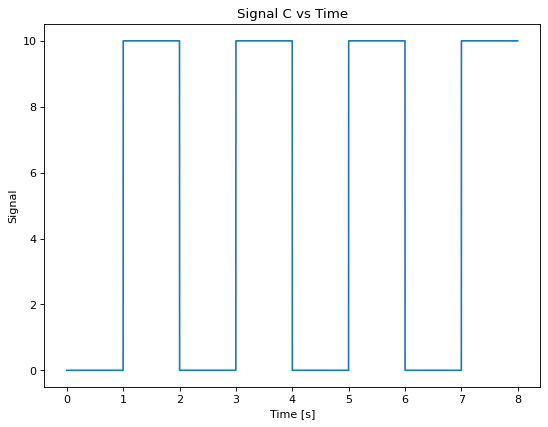

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
timeC = sigC["Time"].to_numpy()
signalC = sigC["Signal"].to_numpy()
plt.plot(timeC,signalC)
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal C vs Time')
plt.show()

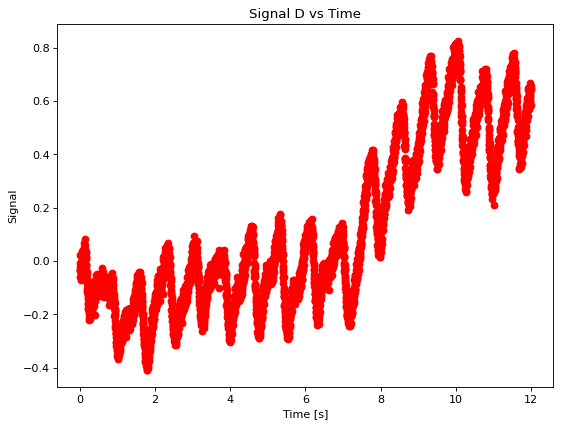

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
timeD = sigD["Time"].to_numpy()
signalD = sigD["Signal"].to_numpy()
plt.plot(timeD,signalD,'ro')
plt.xlabel('Time [s]')
plt.ylabel('Signal')
plt.title('Signal D vs Time')
plt.show()

##PROBLEM 3

In [7]:
sample_rateA = len(timeA)/timeA[-1] #sample_rate for signal A 
sample_rateB  = len(timeB)/timeB[-1]
sample_rateC = len(timeC)/timeC[-1]
sample_rateD = len(timeD)/timeD[-1]

#PROBLEM 4

In [8]:
def FFT(x, y, sample_rate):
  dt = 1.0/10000.0 # 10kHz
  t = x
  # a constant plus 100Hz and 1000Hz
  s = y

  Fs = sample_rate
  Ts = 1.0/Fs; # sampling interval
  ts = np.arange(0,t[-1],Ts) # time vector
  y = s # the data to make the fft from
  n = len(y) # length of the signal
  k = np.arange(n)
  T = n/Fs
  frq = k/T # two sides frequency range
  frq = frq[range(int(n/2))] # one side frequency range
  Y = np.fft.fft(y)/n # fft computing and normalization
  Y = Y[range(int(n/2))]

  fig, (ax1, ax2) = plt.subplots(2, 1)
  ax1.plot(t,y,'b')
  ax1.set_xlabel('Time')
  ax1.set_ylabel('Amplitude')
  ax2.loglog(frq,abs(Y),'b') # plotting the fft
  ax2.set_xlabel('Freq (Hz)')
  ax2.set_ylabel('|Y(freq)|')
  plt.show()

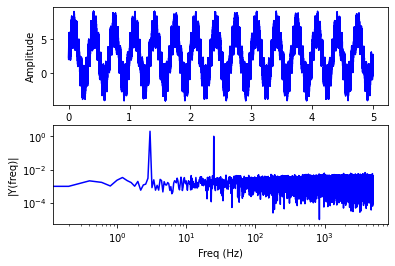

In [9]:
FFT(timeA, signalA, sample_rateA)

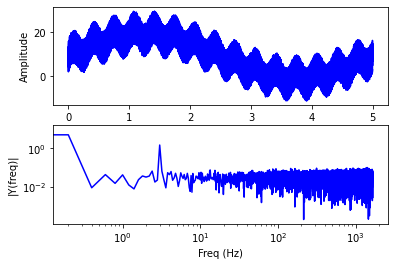

In [10]:
FFT(timeB, signalB, sample_rateB)

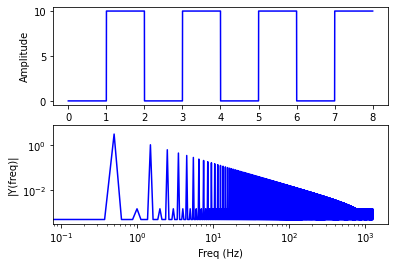

In [11]:
FFT(timeC, signalC, sample_rateC)

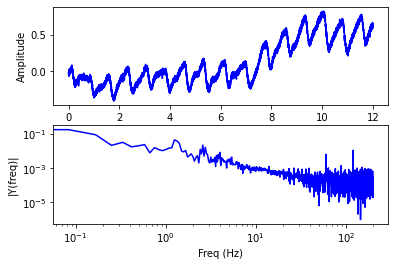

In [12]:
FFT(timeD, signalD, sample_rateD)

##PROBLEM 5

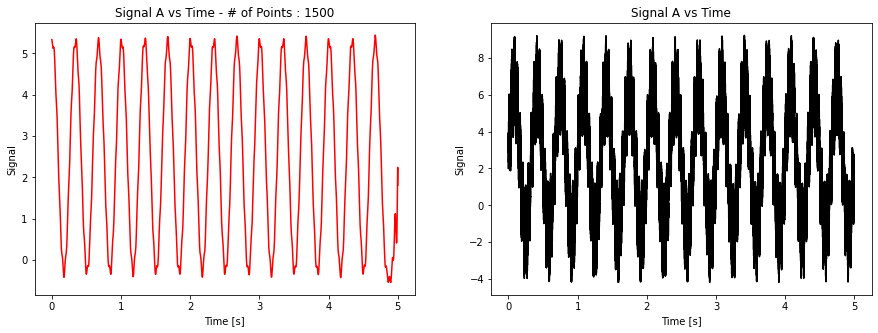

array([5.33166344, 5.33111786, 5.33101387, ..., 2.12105013, 2.11807695,
       1.80748929])

In [64]:
def MAF(number, data, timedata, df, name):
  results = []
  for i in range(len(data)):
    try:
      slicee = data[i:i+number]
      avg = np.mean(slicee)
      results.append(avg)
    except:
      continue 
  fig, axis = plt.subplots(1,2, figsize=(15,5))
  results = np.array(results)
  timeA = df["Time"].to_numpy()
  signalA = df["Signal"].to_numpy()
  axis[0].plot(timeA, results, 'r')
  axis[1].plot(timeA,signalA,'k')
  axis[0].set_xlabel('Time [s]')
  axis[0].set_ylabel('Signal')
  axis[0].set_title('Signal ' + name + ' vs Time - # of Points : ' + str(number))
  axis[1].set_xlabel('Time [s]')
  axis[1].set_ylabel('Signal')
  axis[1].set_title('Signal '+ name + ' vs Time')
  plt.show()
  return results 
MAF(1500, signalA, timeA, sigA, "A")

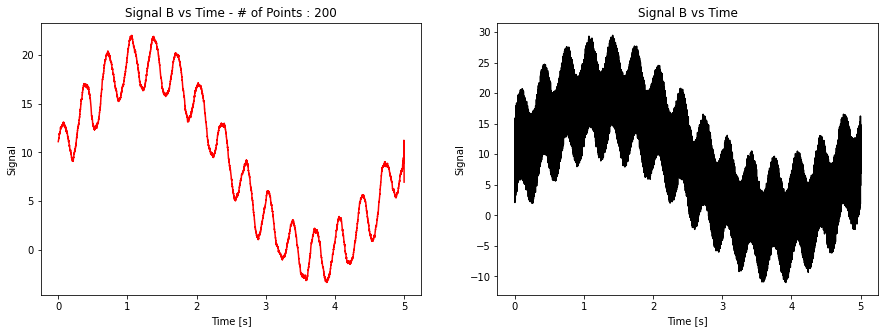

In [63]:
MAF(200, signalB, timeB, sigB, "B")

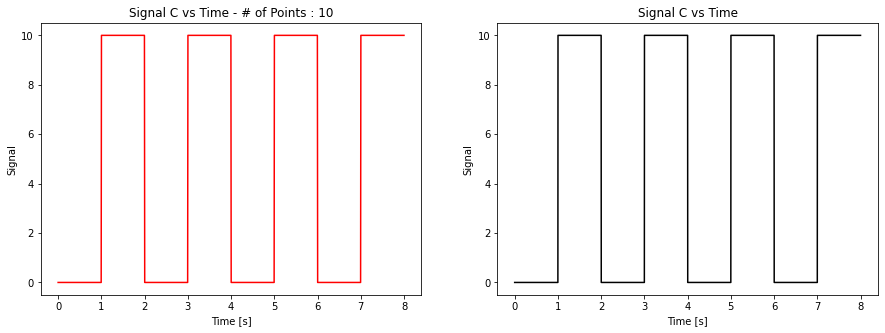

In [61]:
MAF(10, signalC, timeC, sigC, "C")

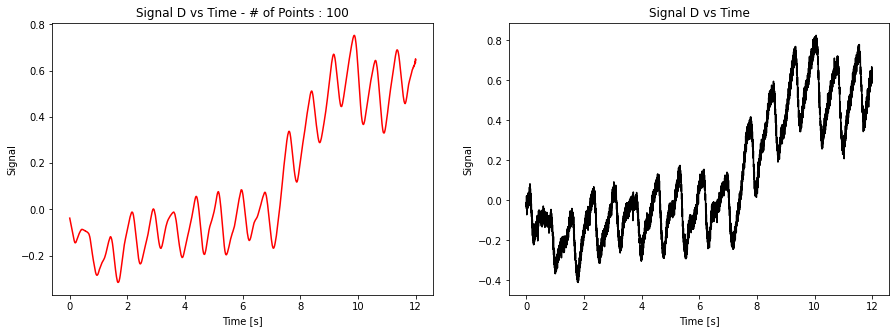

In [58]:
MAF(100, signalD, timeD, sigD, "D")

##PROBLEM 6

In [66]:
def IIR(A, B, data):
  if (A + B) != 1:
    print("Your A and B values dont equal 1")
    return 
  results = []
  avgs = np.ones(len(data))
  for i in range(len(data)):
    avgs[i] = A*avgs[i-1] + B * data[i]
  return avgs

In [68]:
avgA = IIR(.99, 0.01, signalA)
avgB = IIR(.99, 0.01, signalB)
avgC = IIR(.99, 0.01, signalC)
avgD = IIR(.99, .01, signalD)

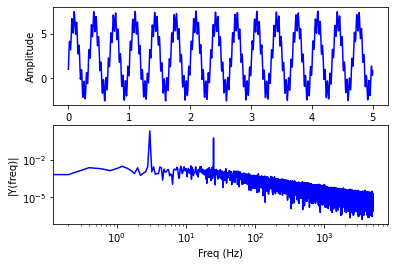

In [69]:
FFT(timeA, avgA, sample_rateA)

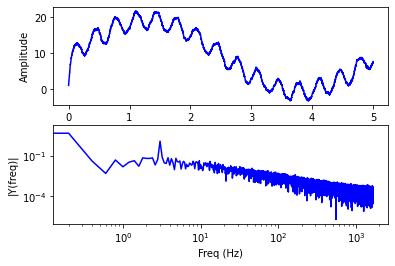

In [70]:
FFT(timeB, avgB, sample_rateB)

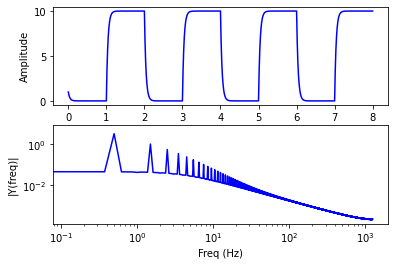

In [71]:
FFT(timeC, avgC, sample_rateC)

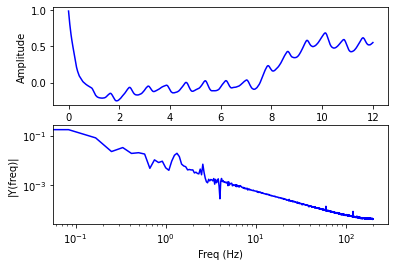

In [72]:
FFT(timeD, avgD, sample_rateD)